This notebook explores LAP-acquired lands dataset and computes some summary statistics.

Done by: Angelia

# Load Data and Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
%matplotlib inline

# input csv
LAP_FILEPATH = '../data/LAP.geojson'
COUNTY_AREA_FILEPATH = '../data/county_area.csv'
LULC_FILEPATH = '../data/LULC_LAP_WOH_intersection.geojson'

# output csv
LAND_COUNTS_FILEPATH = '../data/LAP_annual_counts.csv'
LAND_ACRES_FILEPATH = '../data/LAP_annual_acres.csv'
LAND_ACRES_NORM_FILEPATH = '../data/LAP_annual_acres_normalized.csv'

WOH_COUNTIES = ['Delaware', 'Greene', 'Schoharie', 'Sullivan', 'Ulster']
EOH_COUNTIES = ['Dutchess', 'Putnam', 'Westchester']

In [19]:
areas.index.tolist()

['Delaware',
 'Dutchess',
 'Greene',
 'Putnam',
 'Schoharie',
 'Sullivan',
 'Ulster',
 'Westchester']

In [2]:
df = geopandas.read_file(LAP_FILEPATH)
df.head(2)

,SWIS_SBL,Acquisitio,REType,PROP_ID,County,Town,CLOSING_DT,SOH,PARC_STAT,GIS_Acres,SubProgram,geometry
0,12200032500000010110000000,PRE-MOA,Fee,0,Delaware,Andes,None,West,Complete,497.694050,None,"MULTIPOLYGON (((520740.367 4663055.185, 520743..."
1,12200032500000010120000000,PRE-MOA,Fee,0,Delaware,Andes,None,West,Complete,44.337292,None,"MULTIPOLYGON (((521517.684 4663401.659, 521044..."


In [3]:
df.shape

(3551, 12)

In [3]:
# creating a df out of a subset of the geopandas df
df['CLOSING_DT'] = pd.to_datetime(df.CLOSING_DT)
df['year'] = df['CLOSING_DT'].dt.year
df.head(2)

,SWIS_SBL,Acquisitio,REType,PROP_ID,County,Town,CLOSING_DT,SOH,PARC_STAT,GIS_Acres,SubProgram,geometry,year
0,12200032500000010110000000,PRE-MOA,Fee,0,Delaware,Andes,NaT,West,Complete,497.694050,None,"MULTIPOLYGON (((520740.367 4663055.185, 520743...",NaN
1,12200032500000010120000000,PRE-MOA,Fee,0,Delaware,Andes,NaT,West,Complete,44.337292,None,"MULTIPOLYGON (((521517.684 4663401.659, 521044...",NaN


In [13]:
areas = pd.read_csv(COUNTY_AREA_FILEPATH, index_col=0)
areas = areas.apply(lambda row: row.astype('int'), axis=1)
areas

,sq_miles,acres
County,,
Delaware,1467,938880
Dutchess,825,528000
Greene,647,414080
Putnam,246,157440
Schoharie,626,400640
Sullivan,997,638080
Ulster,1161,743040
Westchester,500,320000


# Summary Statistics

Text(0.5, 1.0, 'NYC DEP owned lands')

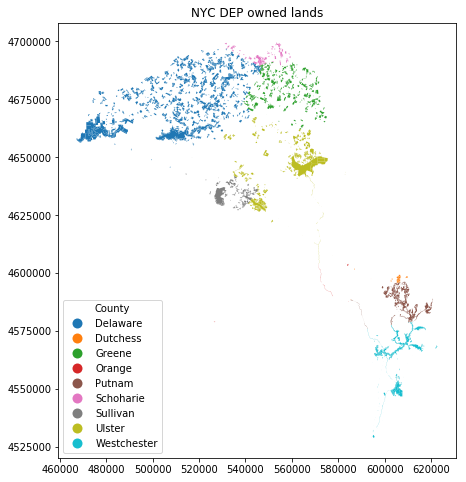

In [4]:
ax = df.plot(figsize=(10,8), 
              column='County', 
              legend=True, 
              legend_kwds={'loc':3, 'title':'County'})
ax.set_title('NYC DEP owned lands')

In [16]:
# land acquired area / county area
(df[df.Acquisitio=='LAP'].groupby('County').agg({'GIS_Acres': 'sum'})\
     .GIS_Acres/areas.acres)\
    .sort_values(ascending=False)

County
Delaware       0.089509
Greene         0.063901
Putnam         0.054151
Ulster         0.028277
Schoharie      0.012644
Sullivan       0.009723
Westchester    0.006261
Dutchess       0.002000
dtype: float64

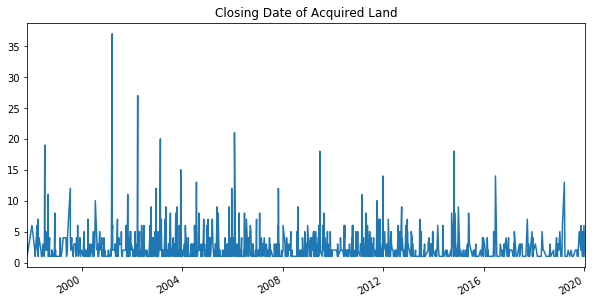

In [17]:
df.CLOSING_DT\
    .value_counts(sort=False)\
    .plot(figsize=(10,5),
          title='Closing Date of Acquired Land')

Text(0.5, 0.98, 'Number of LAP-acquired Lands, per Year')

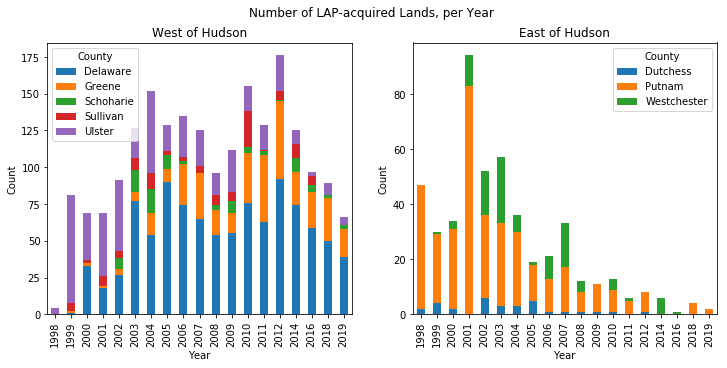

In [78]:
# plot with county, ensure that the numbers are for acquired lands only 
_, axes = plt.subplots(1, 2, sharex=True)
titles = ['West of Hudson', 'East of Hudson']
for i, county_grp in enumerate([WOH_COUNTIES, EOH_COUNTIES]):
    temp = df[(df.Acquisitio=='LAP') & (df.County.isin(county_grp))]\
        .pivot_table(index='year', 
                     columns='County', 
                     values='SWIS_SBL',
                     aggfunc='nunique', 
                     fill_value=0)
    temp.index = temp.index.astype('int')
    temp.plot.bar(stacked=True, 
                  ax=axes[i],
                  figsize=(12,5),
                  title=titles[i])
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Count')

plt.suptitle('Number of LAP-acquired Lands, per Year')

In [79]:
# save csv of annual counts per WOH county
acquired = df[df.Acquisitio=='LAP']\
                .pivot_table(index='year', 
                     columns='County', 
                     values='SWIS_SBL',
                     aggfunc='nunique', 
                     fill_value=0)
acquired.to_csv(LAND_COUNTS_FILEPATH)

Text(0, 0.5, 'Count')

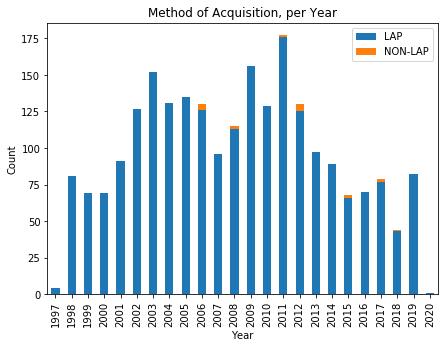

In [134]:
temp = nyc_df.pivot_table(index='year', 
                          columns='Acquisitio', 
                          aggfunc='count', 
                          fill_value=0)
temp = temp['CLOSING_DT']
temp.index = temp.index.astype('int')

ax = temp.plot.bar(stacked=True, 
                   figsize=(7,5),
                   title='Method of Acquisition, per Year')
ax.legend(bbox_to_anchor=(1,1))
ax.set_xlabel('Year')
ax.set_ylabel('Count')

Text(0.5, 0.98, 'Acres of LAP-acquired Lands, per Year')

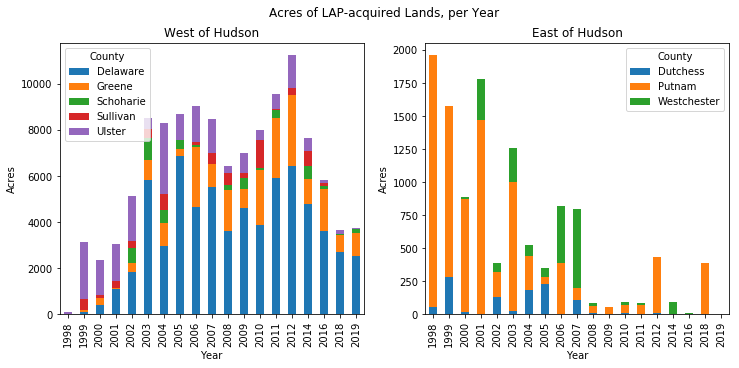

In [38]:
_, axes = plt.subplots(1, 2, sharex=True)
titles = ['West of Hudson', 'East of Hudson']
for i, county_grp in enumerate([WOH_COUNTIES, EOH_COUNTIES]):
    temp = df[(df.Acquisitio=='LAP') & (df.County.isin(county_grp))]\
        .pivot_table(index='year', 
                     columns='County', 
                     values='GIS_Acres',
                     aggfunc='sum', 
                     fill_value=0)
#     temp = temp['Acquisitio']
    temp.index = temp.index.astype('int')
    temp.plot.bar(stacked=True, 
                  ax=axes[i],
                  figsize=(12,5),
                  title=titles[i])

    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Acres')
    
plt.suptitle('Acres of LAP-acquired Lands, per Year')


In [42]:
# saves as csv the acres of lands acquired per year, by county
acquired_acres = df[df.Acquisitio=='LAP']\
        .pivot_table(index='year', 
                     columns='County', 
                     values='GIS_Acres',
                     aggfunc='sum', 
                     fill_value=0)
acquired_acres.to_csv(LAND_ACRES_FILEPATH)

In [46]:
acquired_acres.head(2)

County,Delaware,Dutchess,Greene,Putnam,Schoharie,Sullivan,Ulster,Westchester
year,,,,,,,,
1997.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,113.140498,0.0
1998.0,79.339455,52.63911,114.952669,1904.332258,0.0,448.184119,2494.442626,0.0


In [52]:
areas.transpose().loc['acres']

County
Delaware       938880
Dutchess       528000
Greene         414080
Putnam         157440
Schoharie      400640
Sullivan       638080
Ulster         743040
Westchester    320000
Name: acres, dtype: int64

In [57]:
# acquired acres / county acres
acquired_acres_normed = acquired_acres/areas.transpose().loc['acres']
acquired_acres_normed.to_csv(LAND_ACRES_NORM_FILEPATH)

# Export data as json for viz
### Annual acres

In [7]:
df = pd.read_csv(LAND_ACRES_FILEPATH, dtype={'year': 'int'}, index_col='year')
df.head(2)

,Delaware,Dutchess,Greene,Putnam,Schoharie,Sullivan,Ulster,Westchester
year,,,,,,,,
1997,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,113.140498,0.0
1998,79.339455,52.63911,114.952669,1904.332258,0.0,448.184119,2494.442626,0.0


In [20]:
import json
with open('../output/lap_woh_with_landuse.json', 'r') as f:
    data = json.load(f)

In [21]:
# add annual total land acres info to existing lap json
for county, total_acres_dict in df.to_dict().items():
    if county not in data: 
        data[county] = {}
    data[county]['All Landuse Types'] = total_acres_dict

In [22]:
print(data.keys())
print(data['Delaware'].keys())

dict_keys(['Delaware', 'Greene', 'Schoharie', 'Sullivan', 'Ulster', 'Dutchess', 'Putnam', 'Westchester'])
dict_keys(['Agricultural Land', 'Forest Land', 'Others', 'Urban/Built-up Land', 'All Landuse Types'])


In [23]:
with open('../output/lap.json', 'w') as f:
    json.dump(data, f)

### Annual cumulative acres

In [27]:
df.head()

,Delaware,Dutchess,Greene,Putnam,Schoharie,Sullivan,Ulster,Westchester
year,,,,,,,,
1997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.140498,0.000000
1998,79.339455,52.639110,114.952669,1904.332258,0.000000,448.184119,2494.442626,0.000000
1999,422.136287,278.462069,270.423943,1298.131489,0.000000,141.273826,1528.433320,0.949407
2000,1109.972263,17.611230,25.968306,851.433788,0.000000,322.299167,1580.639026,15.143574
2001,1820.017048,0.000000,410.679083,1466.151928,636.722427,307.663491,1969.480620,312.252120


In [33]:
sum_df = df.cumsum()
sum_df['All Counties'] = sum_df.sum(axis=1)
sum_df.head()

,Delaware,Dutchess,Greene,Putnam,Schoharie,Sullivan,Ulster,Westchester,All Counties
year,,,,,,,,,
1997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.140498,0.000000,113.140498
1998,79.339455,52.639110,114.952669,1904.332258,0.000000,448.184119,2607.583124,0.000000,5207.030735
1999,501.475742,331.101179,385.376612,3202.463747,0.000000,589.457945,4136.016444,0.949407,9146.841076
2000,1611.448005,348.712409,411.344918,4053.897535,0.000000,911.757112,5716.655470,16.092981,13069.908430
2001,3431.465053,348.712409,822.024001,5520.049463,636.722427,1219.420603,7686.136090,328.345101,19992.875147


In [36]:
with open('../output/lap_cumulative_acres.json', 'w') as f:
    json.dump(sum_df.to_dict(), f, indent=2)